In [72]:
import requests
from bs4 import BeautifulSoup
import re
import ast
import pandas as pd
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [73]:
START_DATE = datetime(2021, 1, 26)
today = datetime.today()
day_list = []

while START_DATE <= today:
    day_list.append(START_DATE)
    START_DATE += timedelta(days=1)

day_list

[datetime.datetime(2021, 1, 26, 0, 0),
 datetime.datetime(2021, 1, 27, 0, 0),
 datetime.datetime(2021, 1, 28, 0, 0),
 datetime.datetime(2021, 1, 29, 0, 0),
 datetime.datetime(2021, 1, 30, 0, 0),
 datetime.datetime(2021, 1, 31, 0, 0),
 datetime.datetime(2021, 2, 1, 0, 0),
 datetime.datetime(2021, 2, 2, 0, 0),
 datetime.datetime(2021, 2, 3, 0, 0),
 datetime.datetime(2021, 2, 4, 0, 0),
 datetime.datetime(2021, 2, 5, 0, 0),
 datetime.datetime(2021, 2, 6, 0, 0),
 datetime.datetime(2021, 2, 7, 0, 0),
 datetime.datetime(2021, 2, 8, 0, 0),
 datetime.datetime(2021, 2, 9, 0, 0),
 datetime.datetime(2021, 2, 10, 0, 0),
 datetime.datetime(2021, 2, 11, 0, 0),
 datetime.datetime(2021, 2, 12, 0, 0),
 datetime.datetime(2021, 2, 13, 0, 0),
 datetime.datetime(2021, 2, 14, 0, 0),
 datetime.datetime(2021, 2, 15, 0, 0),
 datetime.datetime(2021, 2, 16, 0, 0),
 datetime.datetime(2021, 2, 17, 0, 0),
 datetime.datetime(2021, 2, 18, 0, 0),
 datetime.datetime(2021, 2, 19, 0, 0),
 datetime.datetime(2021, 2, 20, 0,

In [60]:
df = pd.DataFrame()
for date in day_list:
    day = date.day
    month = date.month
    year = date.year
    
    # Define the date and time components
    hour = 0  # Starting hour
    minute = 0  # Starting minute
    second = 0  # Starting second

    # Create a list to store datetime values
    datetime_values = []

    # Define the time interval (10 minutes)
    time_interval = timedelta(minutes=10)

    # Create datetime values with 10-minute intervals for the entire day
    while hour < 24:
        current_datetime = datetime(year, month, day, hour, minute, second)
        datetime_values.append(current_datetime)
        minute += 10
        if minute == 60:
            minute = 0
            hour += 1

    url = f"http://www.wiatrkadyny.pl/rewa/wxwugraphs/graphd1a.php?theme=pepper&d={day}&m={month}&y={year}&w=900&h=350"


    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
    else:
        print(f"Failed to fetch data from {url}")

    patternWindSpeed = r'var dAvgWS\s*=\s*(\[.*?\]);'
    patternWindGust = r'var dGustWS\s*=\s*(\[.*?\]);'
    patternTemp = r'var dTemp\s*=\s*(\[.*?\]);'
    patternWindDir = r'var dWindDir\s*=\s*(\[.*?\]);'
    patternBaro = r'var dBaro\s*=\s*(\[.*?\]);'

    # Use re.findall to find all matches in the HTML content
    WindSpeed = re.findall(patternWindSpeed, str(soup.contents), re.IGNORECASE | re.DOTALL)
    WindGust = re.findall(patternWindGust, str(soup.contents), re.IGNORECASE | re.DOTALL)
    Temp = re.findall(patternTemp, str(soup.contents), re.IGNORECASE | re.DOTALL)
    WindDir = re.findall(patternWindDir, str(soup.contents), re.IGNORECASE | re.DOTALL)
    Baro = re.findall(patternBaro, str(soup.contents), re.IGNORECASE | re.DOTALL)

    # Remove the trailing comma to make it a valid JSON-like format
    WindSpeed = ast.literal_eval(WindSpeed[0].rstrip(','))[:-1]
    WindGust = ast.literal_eval(WindGust[0].rstrip(','))[:-1]
    Temp = ast.literal_eval(Temp[0].rstrip(','))[:-1]
    WindDir = ast.literal_eval(WindDir[0].rstrip(','))[:-1]
    Baro = ast.literal_eval(Baro[0].rstrip(','))[:-1]

    print(len(WindSpeed))
    print(len(WindGust))
    print(len(Temp))
    print(len(WindDir))
    print(len(Baro))

    # Create a DataFrame
    data = {
        'Time': datetime_values,
        'WindSpeed': WindSpeed,
        'WindGust': WindGust,
        'Temp': Temp,
        'WindDir': WindDir,
        'Baro': Baro
    }

    df_i = pd.DataFrame(data)
    df = pd.concat([df,df_i])
    time.sleep(5)



<!DOCTYPE html public "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">

<html>
<head>
<!-- compat. mode for highcharts bug in IE8 + WinXP + Highcharts 2.0 -->
<meta content="IE=EmulateIE7" http-equiv="X-UA-Compatible"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Temperatura 26.01.2021 - REWA KITE SPOT</title>
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.4.2/jquery.min.js" type="text/javascript"></script>
<script src="./js/highcharts.js" type="text/javascript"></script>
<script src="./js/exporting.js" type="text/javascript"></script>
<!--[if IE]>
			<script type="text/javascript" src="./js/excanvas.compiled.js"></script>
		<![endif]-->
<!-- 2. Add the JavaScript to initialize the chart on document ready -->
<script type="text/javascript">
var dTemp    = [1.2,1.2,1.3,1.1,1.1,1.0,1.0,1.0,1.1,1.1,1.0,1.0,1.2,1.1,1.2,1.3,1.3,1.4,1.4,1.4,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.4,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.3,1.1,1.0

/Users/krystianpietrzak/Documents/ML/WindPRO/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/krystianpietrzak/Documents/ML/WindPRO/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/krystianpietrzak/Documents/ML/WindPRO/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/krystianpietrzak/Documents/ML/WindPRO/.conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: F

<Axes: xlabel='Time', ylabel='WindSpeed'>

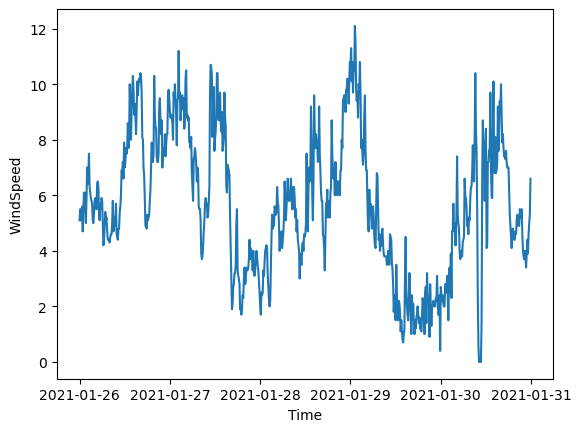

In [67]:
sns.lineplot(data=df, x='Time', y='WindSpeed')

In [61]:
df.to_csv('data.csv')